In [1]:
import numpy as np 
import pickle
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
train = pd.read_csv('kdd_train.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['protocol_type']=le.fit_transform(train['protocol_type'].astype("str"))
train['protocol_type'].value_counts()

1    102689
2     14993
0      8291
Name: protocol_type, dtype: int64

In [4]:
train['labels'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [5]:

train.loc[train['labels']=='neptune', 'labels'] = 'attacker'
train.loc[train['labels']=='teardrop', 'labels'] = 'attacker'
train.loc[train['labels']=='smurf', 'labels'] = 'attacker'
train.loc[train['labels']=='pod', 'labels'] = 'attacker'
train.loc[train['labels']=='back', 'labels'] = 'attacker'
train.loc[train['labels']=='land', 'labels'] = 'attacker'

train.loc[train['labels']=='warezclient', 'labels'] = 'attacker'
train.loc[train['labels']=='ipsweep', 'labels'] = 'attacker'
train.loc[train['labels']=='portsweep', 'labels'] = 'attacker'
 
train.loc[train['labels']=='nmap', 'labels'] = 'attacker'
train.loc[train['labels']=='satan', 'labels'] = 'attacker'
train.loc[train['labels']=='guess_passwd', 'labels'] = 'attacker'
train.loc[train['labels']=='ftp_write', 'labels'] = 'attacker' 
train.loc[train['labels']=='multihop', 'labels'] = 'attacker' 
train.loc[train['labels']=='rootkit', 'labels'] = 'attacker' 
train.loc[train['labels']=='buffer_overflow', 'labels'] = 'attacker' 
train.loc[train['labels']=='imap', 'labels'] = 'attacker' 
train.loc[train['labels']=='loadmodule', 'labels'] = 'attacker' 
train.loc[train['labels']=='phf', 'labels'] = 'attacker' 
train.loc[train['labels']=='spy', 'labels'] = 'attacker' 
train.loc[train['labels']=='perl', 'labels'] = 'attacker' 
train.loc[train['labels']=='warezmasterl', 'labels'] = 'attacker' 

train.loc[train['labels']=='warezmaster', 'labels'] = 'attacker' 
 

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['protocol_type']=le.fit_transform(train['protocol_type'].astype("str"))
train['protocol_type'].value_counts() 

1    102689
2     14993
0      8291
Name: protocol_type, dtype: int64

In [7]:
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#train['service']=le.fit_transform(train['service'].astype("str"))
#train['service'].value_counts() 

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['flag']=le.fit_transform(train['flag'].astype("str"))
train['flag'].value_counts() 

9     74945
5     34851
1     11233
4      2421
2      1562
6       365
10      271
7       127
3       103
8        49
0        46
Name: flag, dtype: int64

In [9]:
 x_train= train[['duration','dst_bytes','src_bytes','is_guest_login','is_host_login','diff_srv_rate','srv_diff_host_rate','flag','protocol_type']]

In [10]:
 rain= train[['duration','dst_bytes','src_bytes','is_guest_login','is_host_login','diff_srv_rate','srv_diff_host_rate', 'service','flag','protocol_type','labels']]

In [11]:
rain.tail()

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels
125968,0,0,0,0,0,0.06,0.0,private,5,1,attacker
125969,8,145,105,0,0,0.00,0.0,private,9,2,normal
125970,0,384,2231,0,0,0.00,0.0,smtp,9,1,normal
125971,0,0,0,0,0,0.05,0.0,klogin,5,1,attacker
125972,0,0,151,0,0,0.00,0.0,ftp_data,9,1,normal


In [12]:
rain

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels
0,0,0,491,0,0,0.00,0.00,ftp_data,9,1,normal
1,0,0,146,0,0,0.15,0.00,other,9,2,normal
2,0,0,0,0,0,0.07,0.00,private,5,1,attacker
3,0,8153,232,0,0,0.00,0.00,http,9,1,normal
4,0,420,199,0,0,0.00,0.09,http,9,1,normal
...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0.06,0.00,private,5,1,attacker
125969,8,145,105,0,0,0.00,0.00,private,9,2,normal
125970,0,384,2231,0,0,0.00,0.00,smtp,9,1,normal
125971,0,0,0,0,0,0.05,0.00,klogin,5,1,attacker


In [13]:
rain[(rain['labels']=='probe')].head()

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels


In [14]:
rain[(rain['labels']=='normal')].head()

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels
0,0,0,491,0,0,0.00,0.00,ftp_data,9,1,normal
1,0,0,146,0,0,0.15,0.00,other,9,2,normal
3,0,8153,232,0,0,0.00,0.00,http,9,1,normal
4,0,420,199,0,0,0.00,0.09,http,9,1,normal
12,0,2251,287,0,0,0.00,0.43,http,9,1,normal


In [15]:
rain[(rain['labels']=='dos')].head()

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels


In [16]:
rain[(rain['labels']=='R2L')].head()

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels


In [17]:
rain[(rain['labels']=='attacker')].head()

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,service,flag,protocol_type,labels
2,0,0,0,0,0,0.07,0.0,private,5,1,attacker
5,0,0,0,0,0,0.06,0.0,private,1,1,attacker
6,0,0,0,0,0,0.06,0.0,private,5,1,attacker
7,0,0,0,0,0,0.06,0.0,private,5,1,attacker
8,0,0,0,0,0,0.05,0.0,remote_job,5,1,attacker


In [18]:
x_train

,duration,dst_bytes,src_bytes,is_guest_login,is_host_login,diff_srv_rate,srv_diff_host_rate,flag,protocol_type
0,0,0,491,0,0,0.00,0.00,9,1
1,0,0,146,0,0,0.15,0.00,9,2
2,0,0,0,0,0,0.07,0.00,5,1
3,0,8153,232,0,0,0.00,0.00,9,1
4,0,420,199,0,0,0.00,0.09,9,1
...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0.06,0.00,5,1
125969,8,145,105,0,0,0.00,0.00,9,2
125970,0,384,2231,0,0,0.00,0.00,9,1
125971,0,0,0,0,0,0.05,0.00,5,1


In [19]:
y_train=train['labels']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=9)
print(X_train.shape)
print(X_test.shape)

(88181, 9)
(37792, 9)


In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=9)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:


classifier = RandomForestClassifier(n_estimators=10, random_state=0)
classifier.fit(X_train_scaled_pca, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [25]:
classifier.score(X_train_scaled_pca,y_train)

0.9936721062360372

In [26]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test_scaled_pca )
accuracy_score(y_pred,y_test)

0.992114733276884

In [27]:
import sklearn.metrics

In [28]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    attacker       0.99      0.99      0.99     17666
      normal       0.99      0.99      0.99     20126

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [29]:
y_pred = classifier.predict(X_test_scaled_pca )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[17474,   192],
       [  106, 20020]], dtype=int64)

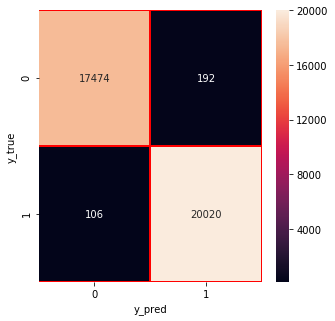

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [31]:
import pickle

pickle.dump(classifier,open('sk.pkl','wb'))

pickle.dump(pca, open('kdd.pkl', 'wb'))

In [32]:
model = pickle.load(open('sk.pkl', 'rb'))
print(model)

RandomForestClassifier(n_estimators=10, random_state=0)


In [33]:
pca = pickle.load(open('kdd.pkl', 'rb'))
print(pca)

PCA(n_components=9)
